In [1]:
# import necessary libraries for a computer vision problem
import torch
from torch import nn 

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt


In [374]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

In [33]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [34]:
image.shape
# [color channel, height, width]



torch.Size([1, 28, 28])

In [14]:
# lets see how many samples we have
print(f"len(train_data.data) : {len(train_data.data)}")
print(f"len(test_data.data): {len(test_data.data)}")
print()
# what are the classes?
class_names = train_data.classes
print(class_names)

len(train_data.data) : 60000
len(test_data.data): 10000

tensor([9, 0, 0,  ..., 3, 0, 5])
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


(-0.5, 27.5, 27.5, -0.5)

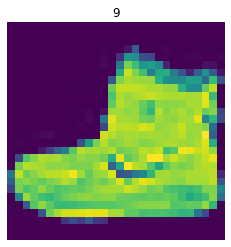

In [375]:
# lets visualize one of these datas
image, label = train_data[0]
plt.imshow(image.squeeze())
plt.title(label)
plt.axis('off')

Text(0.5, 1.0, 'Ankle boot')

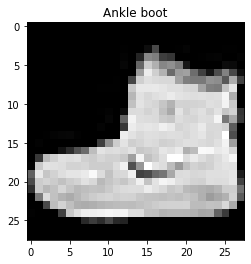

In [376]:
plt.imshow(image.squeeze(dim=0), cmap="gray")
plt.title(class_names[label])

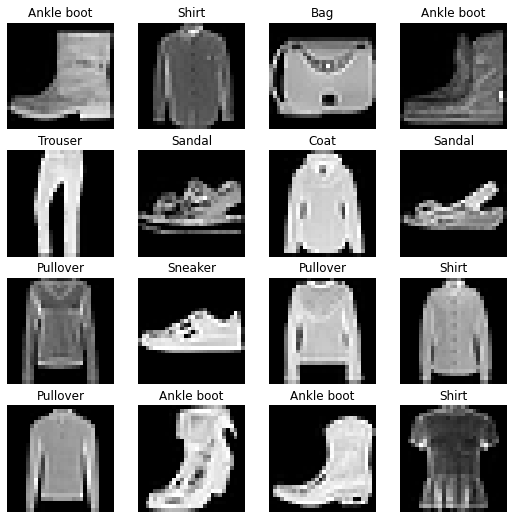

In [377]:
# let's see a few more images from this dataset
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4

for i in range(1, rows * cols +1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(),cmap="gray")
    plt.title(class_names[label])
    plt.axis("off")
    
    


In [378]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch? 
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f8d29652dc0>, <torch.utils.data.dataloader.DataLoader object at 0x7f8d48588dc0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [80]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image Size: torch.Size([1, 28, 28])
label: 4, label size: torch.Size([])


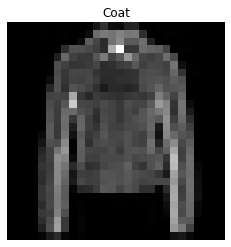

In [81]:
# lets see a sample

torch.manual_seed(42)
random_idx =  torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("off")
print(f"Image Size: {img.shape}")
print(f"label: {label}, label size: {label.shape}")

In [379]:

# we should start with a flatten model to change the data into simple vectors
flatten_model = nn.Flatten()

# get a single image from a batch of data
x = train_features_batch[0]

# flatten the data
output = flatten_model(x) # 784 = 28 * 28

# lets see the shape of the data
print(f"Shape of the image before flatten: {x.shape}")
print(f"Shape of the image after flatten: {output.shape}")



Shape of the image before flatten: torch.Size([1, 28, 28])
Shape of the image after flatten: torch.Size([1, 784])


In [380]:
# lets build a baseline model now with only 2 linear layers
from torch import nn
class FashionMNISTModelV0(nn.Module):
    
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        logits = self.layer_stack(x)
        return logits



In [381]:
# now let's create an instance of this model
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(input_shape=784, 
                              hidden_units=8, 
                              output_shape=10)

model_0.to("cpu")


FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=10, bias=True)
  )
)

In [382]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [383]:
# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [35]:
# creating a timing function to see how long it takes to train the model
from timeit import default_timer as timer
def print_train_time(start:float,
                     end:float,
                     device:torch.device=None):
    """Prints the difference between a start and end time 
    
    Args:
        start (float): Start time of computation.
        end (float): End time of computation.
        device (torch.device, optional): Device computation was performed on. Defaults to None.
    
    Returns:
        float: time between start and end in seconds.
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.2f} seconds")
    return total_time

In [37]:
# Now let's create a training/evaluation loop
# we can use tqdm to visualize the training progress with a progress bar

from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch} \n ----------")
    ## Training 
    train_loss = 0 # we calculate the loss for each batch and then take the average

    # we need a loop to loop through the training batches
    for batch, (X,y) in enumerate(train_dataloader):
        # Step 0: put the model on training mode
        model_0.train()

        # Step 1: forward pass
        y_pred = model_0(X)

        # Step 2: calculate the loss for each batch
        loss = loss_fn(y_pred, y)
        train_loss += loss 

        # Step 3: Optimizer zero grad
        optimizer.zero_grad()

        # Step 4: backward pass
        loss.backward()

        # Step 5: update the weights
        optimizer.step()

        # print how many samples model have seen
        if batch % 200 == 0:
            print(f"Looked at {batch * len(X)}/len(train_dataloader.dataset) samples")


    # Divide total train loss by length of train dataloader to get average train loss for epoch
    train_loss /= len(train_dataloader)


    ## Evaluation
    test_loss, test_acc = 0, 0

    # Step 0: put the model on evaluation mode
    model_0.eval()

    with torch.inference_mode():
        for X, y in test_dataloader:
            # Step 1: forward pass
            y_pred = model_0(X)

            # Step 2: calculate the loss and accuracy for each batch
            test_loss += loss_fn(y_pred, y)
            test_acc += accuracy_fn(y_true = y, y_pred=y_pred.argmax(dim=1))
            

        # Divide total test loss by length of test dataloader to get average test loss for epoch
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    # Print what is happening around
    print(f"\nTrain loss: {train_loss:.2f} | Test loss: {test_loss:.2f} | Test accuracy: {test_acc:.2f}%")


# Calculate the training time
train_time_end_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_cpu, end=train_time_end_cpu, device="CPU")







  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
 ----------
Looked at 0/len(train_dataloader.dataset) samples
Looked at 6400/len(train_dataloader.dataset) samples
Looked at 12800/len(train_dataloader.dataset) samples
Looked at 19200/len(train_dataloader.dataset) samples
Looked at 25600/len(train_dataloader.dataset) samples
Looked at 32000/len(train_dataloader.dataset) samples
Looked at 38400/len(train_dataloader.dataset) samples
Looked at 44800/len(train_dataloader.dataset) samples
Looked at 51200/len(train_dataloader.dataset) samples
Looked at 57600/len(train_dataloader.dataset) samples


 33%|███▎      | 1/3 [00:07<00:14,  7.41s/it]


Train loss: 0.45 | Test loss: 0.47 | Test accuracy: 83.45%
Epoch: 1 
 ----------
Looked at 0/len(train_dataloader.dataset) samples
Looked at 6400/len(train_dataloader.dataset) samples
Looked at 12800/len(train_dataloader.dataset) samples
Looked at 19200/len(train_dataloader.dataset) samples
Looked at 25600/len(train_dataloader.dataset) samples
Looked at 32000/len(train_dataloader.dataset) samples
Looked at 38400/len(train_dataloader.dataset) samples
Looked at 44800/len(train_dataloader.dataset) samples
Looked at 51200/len(train_dataloader.dataset) samples
Looked at 57600/len(train_dataloader.dataset) samples


 67%|██████▋   | 2/3 [00:14<00:07,  7.30s/it]


Train loss: 0.44 | Test loss: 0.51 | Test accuracy: 82.48%
Epoch: 2 
 ----------
Looked at 0/len(train_dataloader.dataset) samples
Looked at 6400/len(train_dataloader.dataset) samples
Looked at 12800/len(train_dataloader.dataset) samples
Looked at 19200/len(train_dataloader.dataset) samples
Looked at 25600/len(train_dataloader.dataset) samples
Looked at 32000/len(train_dataloader.dataset) samples
Looked at 38400/len(train_dataloader.dataset) samples
Looked at 44800/len(train_dataloader.dataset) samples
Looked at 51200/len(train_dataloader.dataset) samples
Looked at 57600/len(train_dataloader.dataset) samples


100%|██████████| 3/3 [00:21<00:00,  7.32s/it]


Train loss: 0.43 | Test loss: 0.52 | Test accuracy: 82.75%
Train time on CPU: 21.96 seconds


In [57]:
# now let's functionize the testing loop
# we need a function that takes our trained model, a DataLoader, a loss function and an accuracy function

torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device:torch.device = device):
        """ Returns a dictionary containing the results of model predicting on data_loader.
        Args:
            model (torch.nn.Module): a Pytorch model capable of making predictions on data_loader.
            data_loader (torch.utils.data.DataLoader): a Pytorch DataLoader containing data for model to evaluate.
            loss_fn (torch.nn.Module): a Pytorch loss function used for evaluating model prediction results.
            accuracy_fn (function): a function for calculating model accuracy.

        Returns:
            (dict): Results of model making predictions on data_loader
        """

        loss, acc = 0, 0
        model.eval()
        with torch.inference_mode():
            for X, y in data_loader:
                y_pred = model(X)

                loss += loss_fn(y_pred, y)
                acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
                
            loss /= len(data_loader)
            acc /= len(data_loader)
            return {"model_name": model.__class__.__name__,
                    "model_loss": loss.item(),
                    "model_acc": acc}
        
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5178602933883667,
 'model_acc': 82.78753993610223}

In [356]:
# for the next model, we want to write a device agnostic code, so if you have a GPU, you can leverage its power
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [105]:
# As for our 2nd model, let's add a non-linear activation function to our hidden layer
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x):
        return self.layer_stack(x)

In [106]:
# lets create an instance of this model
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=16,
                              output_shape=10).to(device)

# lets check the device for this mode
next(model_1.parameters()).device

device(type='cpu')

In [107]:
# before making a training loop, we need a loss function and an optimizer
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [384]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")


In [385]:
# now lets use them and also measure how long it will take to train the model on the GPU (if we have one)
from timeit import default_timer as timer 
train_time_start_gpu = timer()
epoch = 3

for epoch in tqdm(range(epoch)):
    print(f"Epoch: {epoch} \n ----------")
    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_1,
                data_loader=test_dataloader,
                loss_fn=loss_fn,
                accuracy_fn=accuracy_fn,
                device=device)
    
train_time_end_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_gpu, end=train_time_end_gpu, device="GPU")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
 ----------
Train loss: 0.39170 | Train accuracy: 85.82%


 33%|███▎      | 1/3 [00:07<00:14,  7.34s/it]

Test loss: 0.45206 | Test accuracy: 84.10%

Epoch: 1 
 ----------
Train loss: 0.39170 | Train accuracy: 85.82%


 67%|██████▋   | 2/3 [00:14<00:07,  7.30s/it]

Test loss: 0.45206 | Test accuracy: 84.10%

Epoch: 2 
 ----------
Train loss: 0.39170 | Train accuracy: 85.82%


100%|██████████| 3/3 [00:21<00:00,  7.25s/it]

Test loss: 0.45206 | Test accuracy: 84.10%

Train time on GPU: 21.76 seconds


In [386]:
# now lets use the evaluation function that we coded previously and evaluate this model.
model_1_reults = eval_model(model=model_1,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device=device)
model_1_reults

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.45206132531166077,
 'model_acc': 84.09544728434504}

In [387]:
# Create a convolutional neural network 
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, 
    hidden_units=10, 
    output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [388]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), 
                             lr=0.1)

In [389]:
# Measure time

from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model 
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_2, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.58033 | Train accuracy: 78.96%


 33%|███▎      | 1/3 [01:10<02:21, 70.64s/it]

Test loss: 0.39392 | Test accuracy: 85.44%

Epoch: 1
---------
Train loss: 0.35668 | Train accuracy: 87.16%


 67%|██████▋   | 2/3 [02:21<01:10, 70.88s/it]

Test loss: 0.36551 | Test accuracy: 86.57%

Epoch: 2
---------
Train loss: 0.31764 | Train accuracy: 88.47%


100%|██████████| 3/3 [03:33<00:00, 71.32s/it]

Test loss: 0.32377 | Test accuracy: 88.41%



In [390]:
# now lets use our evaluate function to evaluate this model
model_2_results = eval_model(model_2, test_dataloader, loss_fn, accuracy_fn, device)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32376760244369507,
 'model_acc': 88.40854632587859}

In [391]:
# now lets compare the models that we've built so far
import pandas as pd
compare_results=pd.DataFrame([model_0_results, model_1_reults, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.517860,82.787540
1,FashionMNISTModelV1,0.452061,84.095447
2,FashionMNISTModelV2,0.323768,88.408546


In [392]:
compare_results["training_time"]= [total_train_time_model_0, total_train_time_model_1, total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.517860,82.787540,21.957834
1,FashionMNISTModelV1,0.452061,84.095447,21.762080
2,FashionMNISTModelV2,0.323768,88.408546,211.623771


In [393]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())
            
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [394]:
import random
#random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 0 (T-shirt/top)


In [395]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2, 
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]


tensor([[4.6093e-01, 1.4168e-05, 3.5588e-04, 2.1910e-03, 6.5201e-04, 3.0346e-07,
         5.3502e-01, 1.8671e-06, 8.3358e-04, 3.2745e-07],
        [6.2932e-05, 2.4530e-06, 6.1576e-01, 1.2902e-04, 3.8308e-01, 2.8607e-08,
         9.4933e-04, 1.6034e-08, 1.1694e-05, 6.6853e-08]])

In [396]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([6, 2, 5, 8, 5, 8, 9, 8, 5])

In [397]:
# Are our predictions in the same form as our test labels? 
test_labels, pred_classes

([0, 2, 7, 8, 5, 8, 9, 8, 5], tensor([6, 2, 5, 8, 5, 8, 9, 8, 5]))

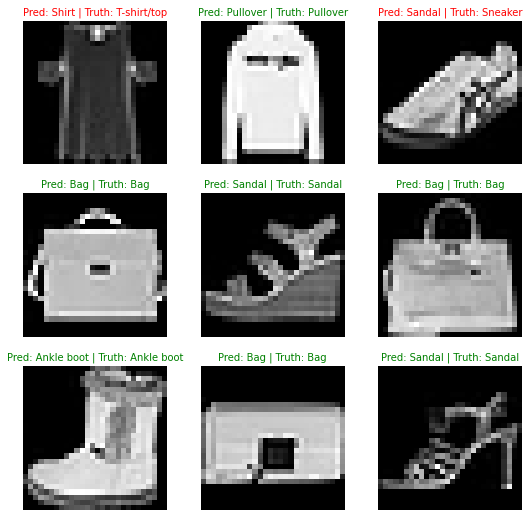

In [398]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]] 

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  
  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

size of random sample unsqueezed: torch.Size([1, 1, 28, 28])
random sample pred index: 0 | random sample pred label: T-shirt/top (T-shirt/top)
Prediction: T-shirt/top | Prediction probability: 0.98


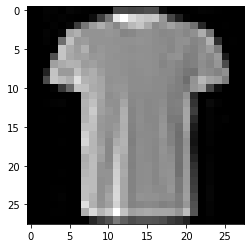

In [399]:
idx_number = torch.randint(0, len(test_data), size=[1]).item()
idx_number
random_sample = test_data[idx_number][0]
plt.imshow(random_sample.squeeze(), cmap="gray")
print(f"size of random sample unsqueezed: {random_sample.unsqueeze(dim=0).shape}")

random_sample_logit = model_2(random_sample.unsqueeze(dim=0).to(device))
random_sample_pred_prob = torch.softmax(random_sample_logit.squeeze(), dim=0)
random_sample_pred_label = class_names[random_sample_pred_prob.argmax().item()]
random_sample_pred_index = test_data.targets[idx_number].item()
print(f"random sample pred index: {random_sample_pred_index} | random sample pred label: {random_sample_pred_label} ({class_names[random_sample_pred_index]})")
print(f"Prediction: {random_sample_pred_label} | Prediction probability: {random_sample_pred_prob.max().item():.2f}")

In [400]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.0


In [401]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions: 100%|██████████| 313/313 [00:04<00:00, 71.94it/s]


In [402]:
import mlxtend 
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.23.0


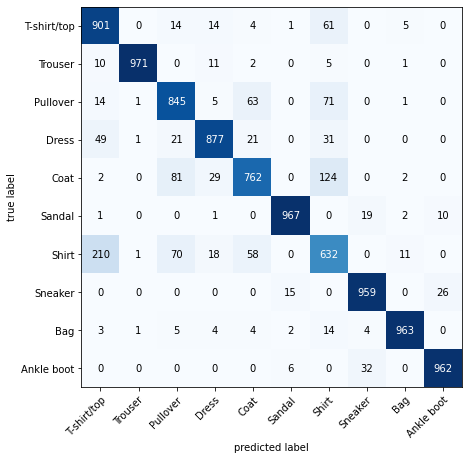

In [403]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);